Szymon Rogowski (405244)
Projekt

Nr:5. Dany jest obraz kolorowy zawierający obiekty o różnej jasności,
za pomocą operacji morfologicznej dylatacji i erozji znajdź na obrazie krawędzie obiektów.
Zmierz długości krawędzi obiektów a wynik przedstaw w postaci histogramu.

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import math
from skimage import io, color
from skimage.filters import threshold_otsu, sobel
from skimage.morphology import binary_dilation, binary_erosion, disk
from skimage.measure import find_contours

print("Libs loaded.")

Libs loaded.


In [35]:
image = io.imread('images/lena.png')

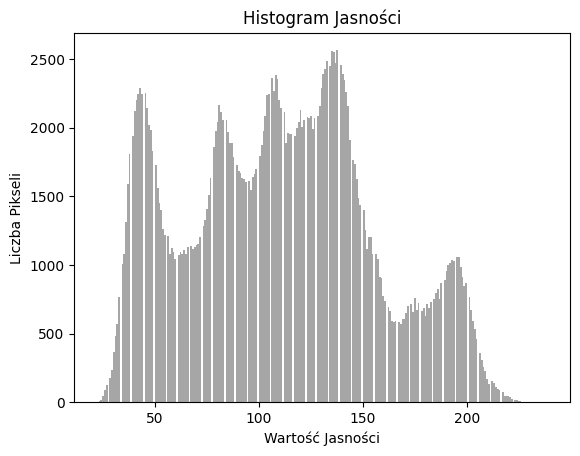

In [36]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram Jasności')
plt.xlabel('Wartość Jasności')
plt.ylabel('Liczba Pikseli')
plt.show()

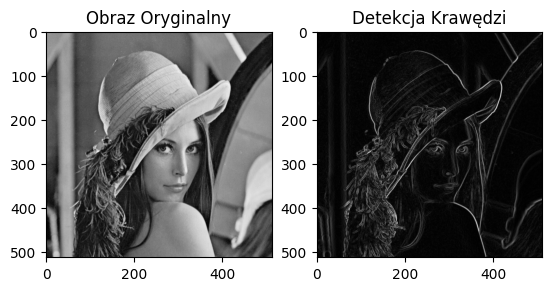

In [37]:
gray_image = color.rgb2gray(image)

edges = sobel(gray_image)

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Obraz Oryginalny')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detekcja Krawędzi')

plt.show()

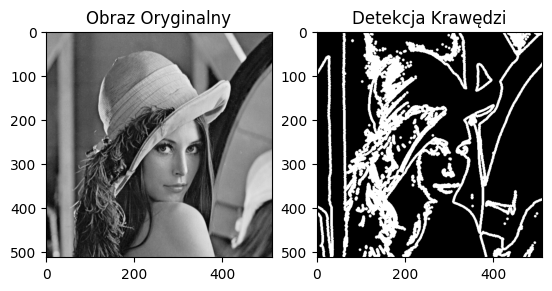

In [38]:
gray_image = color.rgb2gray(image)

threshold_value = threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

selem = disk(3)

dilated_image = binary_dilation(binary_image, selem)

eroded_image = binary_erosion(binary_image, selem)

edges = dilated_image ^ eroded_image

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Obraz Oryginalny')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detekcja Krawędzi')

plt.show()

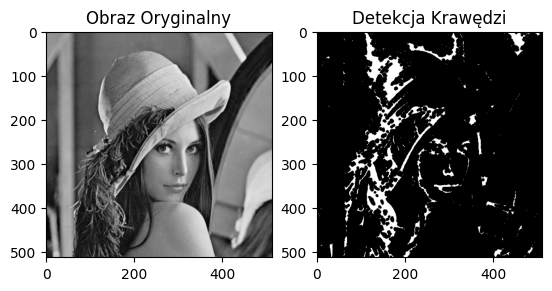

In [39]:
gray_image = color.rgb2gray(image)

threshold_value = threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

# Kernel o r = 3
selem = disk(3)

# Dylatacja
dilated_image = binary_dilation(binary_image, selem)

# Erozja
eroded_image = binary_erosion(binary_image, selem)

# Otwarcie (erosja po dylatacji)
opened_image = binary_erosion(dilated_image, selem)

# Zamknięcie (dylatacja po erozji)
closed_image = binary_dilation(eroded_image, selem)

edges = opened_image ^ closed_image

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Obraz Oryginalny')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detekcja Krawędzi')

plt.show()

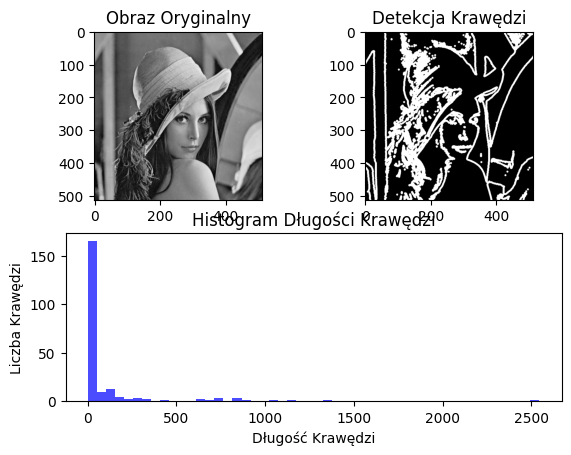

In [41]:
gray_image = color.rgb2gray(image)

threshold_value = threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

selem = disk(3)  # Disk o promieniu 3

dilated_image = binary_dilation(binary_image, selem)

eroded_image = binary_erosion(binary_image, selem)

edges = dilated_image ^ eroded_image

contours = find_contours(edges, 0.8)  # Wybierz poziom progowania

edge_lengths = [len(contour) for contour in contours]

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Obraz Oryginalny')

plt.subplot(2, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detekcja Krawędzi')

plt.subplot(2, 1, 2)
plt.hist(edge_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Histogram Długości Krawędzi')
plt.xlabel('Długość Krawędzi')
plt.ylabel('Liczba Krawędzi')

plt.show()